In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


In [4]:
data.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
count,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413,0.344778
std,201.928205,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078,0.475636
min,0.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000
25%,174.500000,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,349.000000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,523.500000,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,698.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [5]:
data.columns

Index([u'Unnamed: 0', u'id number', u'clump_thickness',
       u'uniformity_of_cell_size', u'uniformity_of_cell_shape',
       u'marginal_adhesion', u'epithelial_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [6]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [7]:
y = data.pop("malignant")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

Grid Search for hyperparameter optimization

In [26]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,4,5]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [27]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
best_rfc = estimator.best_estimator_

In [30]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.964285714286


In [31]:
y_hat = best_rfc.predict(X_test)

In [32]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [33]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

Accuracy for single holdout

In [34]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.964285714286


In [35]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



In [36]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 3 42]]


AUC Score for single holdout method

In [37]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.996257309942


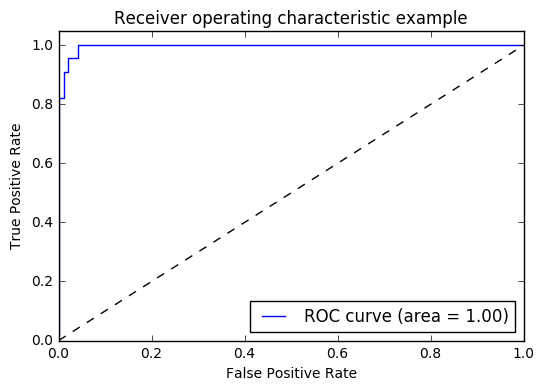

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

K-fold Corssvalidation with K=10

In [39]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [40]:
scores

array([ 0.91549296,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.98571429,  0.98571429,  0.98550725,  0.98550725])

In [41]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968651 +/-  0.019628
95 percent probability that if this experiment were repeated over and over the average score would be between 0.949023 and 0.988279


### Single hold out vs K-fold cross validation
For single hold hout the AUC is 0.996257309942
and the K-fold cross validation score is 0.968651 +/- 0.019628. So the the average CV score for this model will be within the range of 0.949023 and 0.988279

### AUC, Accuracy, Precision and Recall performance

#### AUC: 
The area under the curve is 0.996257309942. This means that for any given given sample in the breast cancer dataset the probability that the patient is malignant is 0.996257309942.

#### Accuracy: 
The accuracy for this model is 0.964285714286. it is the ratio of correctly classified instances over total number of instances. 

#### Precision and Recall:
from the confusion matrix:

[[93 2] 

[3 42]]
 
Number of true positives, the number of patients that have breast cancer which is malignant is 42

Number of false positives, the number of patients that do not have breast cancer which is malignant but are misclassified as being malignant is 2

Number of true negatives, the number of patients have breast cancer which is malignant but are misclassified as not being malignant is 3


In [49]:
tp = 42.0
fp = 2.0
fn = 3.0
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)

print 'Precision is %f' %(Precision)
print "Recall is %f" %(Recall)

Precision is 0.954545
Recall is 0.933333
